In this notebook I will be investigating patterns of observed ocean warming and sea level by modeling the WOA potential pacific ocean temperature data from 1955-2017. My notebook focuses on the pacific ocean, but also global ocean heat content data. 

**This notebook presents ocean heat content for Pacific ocean basin.** 
- Author: Juliet Mulcahy 
- Tun34868@temple.edu

**What is heat content?**

- make sure im doing  different ocean levels
- use all data sets

In [237]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
import pandas as pd
import gcsfs

In [238]:
%matplotlib inline                           
gcs = gcsfs.GCSFileSystem(token='anon')

In [239]:
woa18_1955_64_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1994_04_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [240]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [241]:
woa18_basins = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [242]:
woa18_basins

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

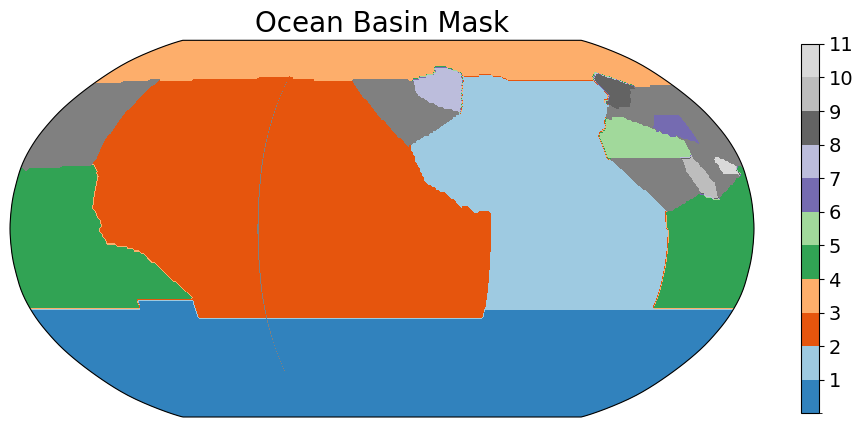

In [243]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [244]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean =(woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))


In [245]:
pacificocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Pacific Ocean')

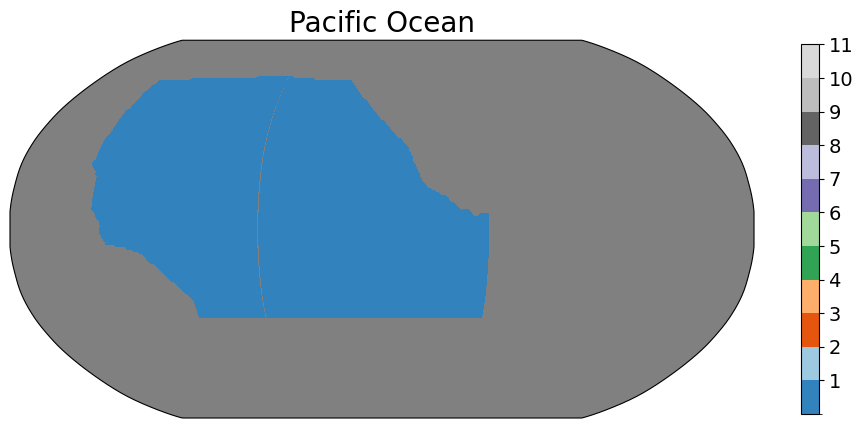

In [246]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = pacificocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific Ocean",fontsize=20)

In [247]:
ocean_heat_content_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
ocean_heat_content_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc',
                                          decode_times=False)

In [248]:
ocean_heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [249]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

Text(0.5, 1.0, 'SST Pacific Ocean 1955 to 1964 averaged')

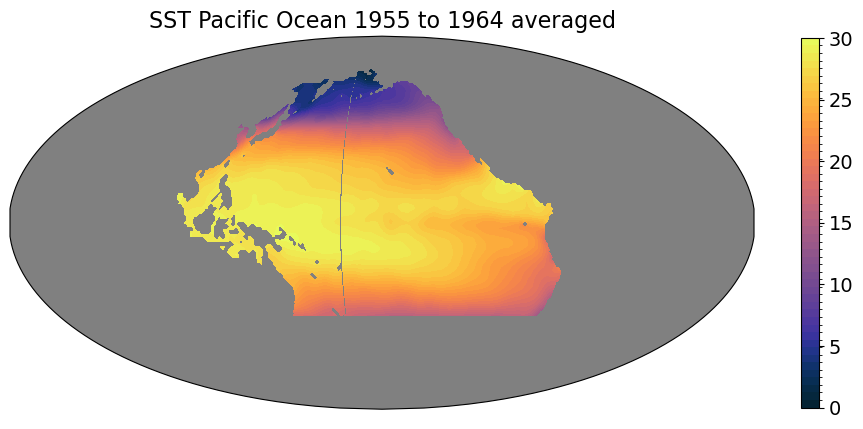

In [291]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1955 to 1964 averaged",fontsize=16)

In [251]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

In [252]:
woa18_1965_74_pacific = woa18_1965_74_potential_temp*pacificocean

In [253]:
woa18_1975_84_pacific = woa18_1975_84_potential_temp*pacificocean

In [254]:
woa18_1985_94_pacific = woa18_1985_94_potential_temp*pacificocean

In [255]:
woa18_1994_04_pacific = woa18_1994_04_potential_temp*pacificocean

In [256]:
woa18_2005_17_pacific = woa18_2005_17_potential_temp*pacificocean

In [257]:
difference55_74 = woa18_1965_74_pacific - woa18_1955_64_pacific
difference55_84 = woa18_1975_84_pacific - woa18_1955_64_pacific
difference55_94 = woa18_1985_94_pacific - woa18_1955_64_pacific
difference55_04 = woa18_1994_04_pacific - woa18_1955_64_pacific
difference55_17 = woa18_2005_17_pacific - woa18_1955_64_pacific

Text(0.5, 1.0, 'SST Pacific Ocean 1955 to 1964 averaged')

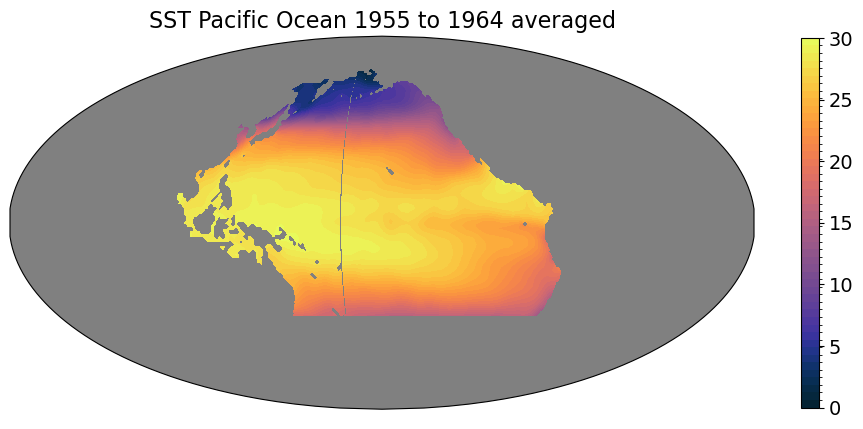

In [292]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1955 to 1964 averaged",fontsize=16)

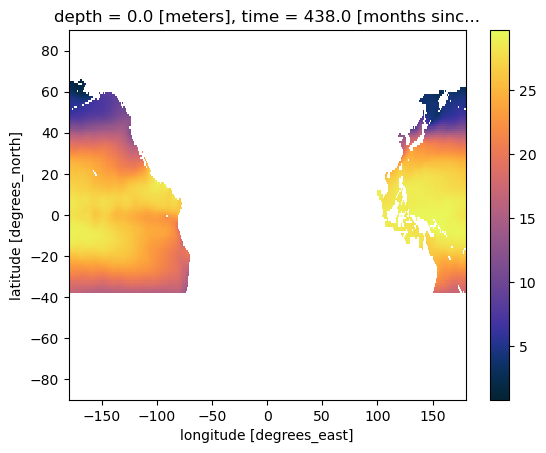

In [293]:
woa18_1955_64_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'SST Pacific Ocean 1965 to 1974 averaged')

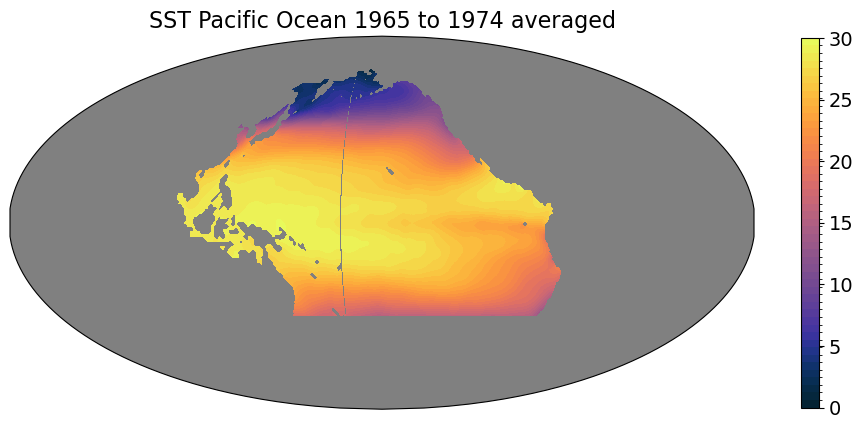

In [294]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1965_74_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1965 to 1974 averaged",fontsize=16)

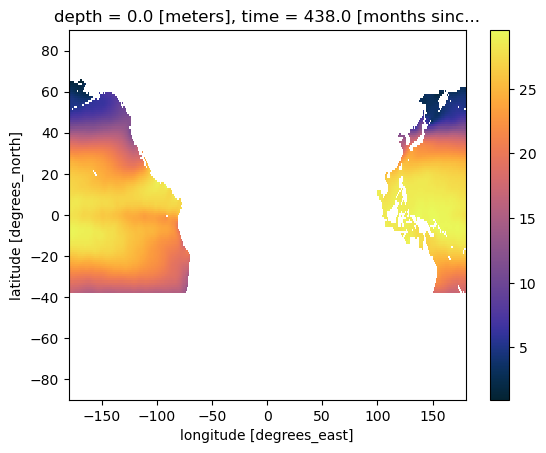

In [295]:
woa18_1965_74_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'SST Pacific Ocean 1975 to 1984 averaged')

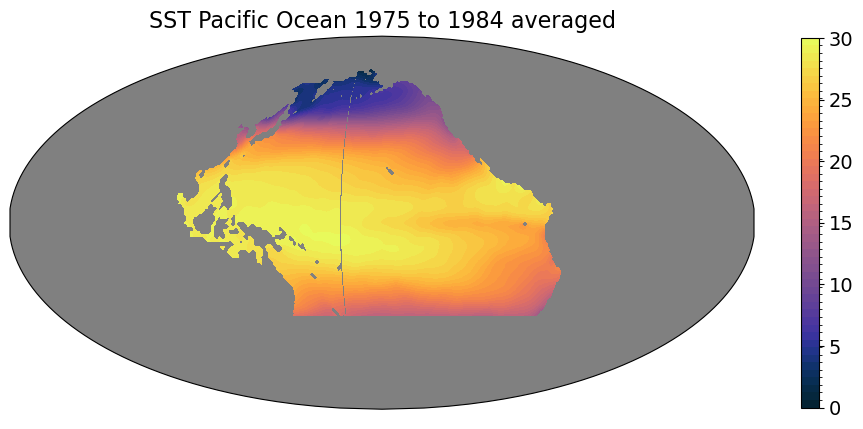

In [296]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1975_84_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1975 to 1984 averaged",fontsize=16)

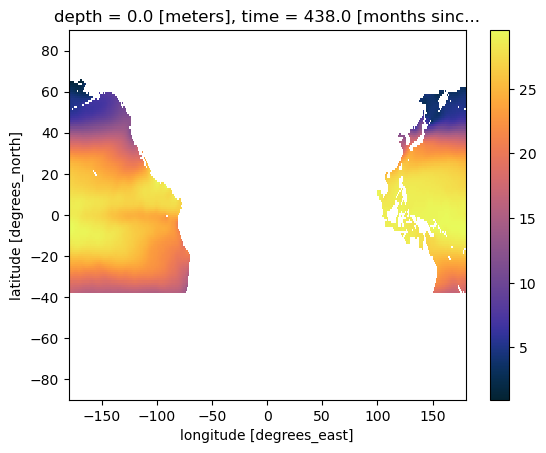

In [297]:
woa18_1975_84_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'SST Pacific Ocean 1985 to 1994 averaged')

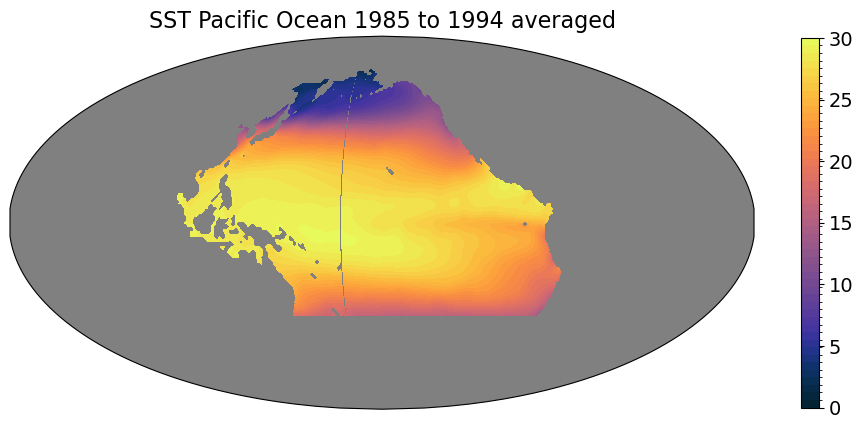

In [298]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1985_94_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1985 to 1994 averaged",fontsize=16)

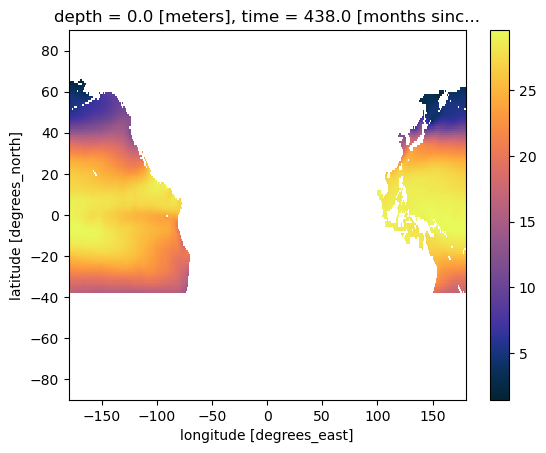

In [299]:
woa18_1985_94_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'SST Pacific 1994 to 2004 averaged')

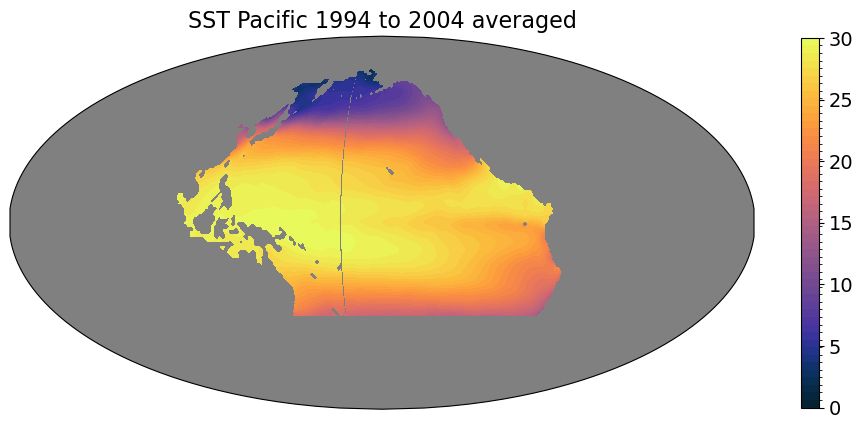

In [300]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1994_04_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific 1994 to 2004 averaged",fontsize=16)

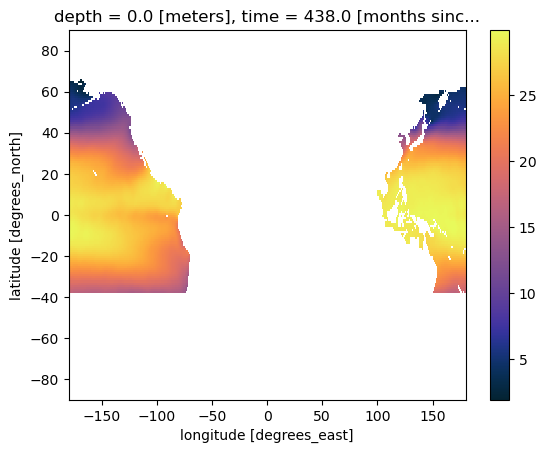

In [301]:
woa18_1994_04_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'SST Pacific 2005 to 2017 averaged')

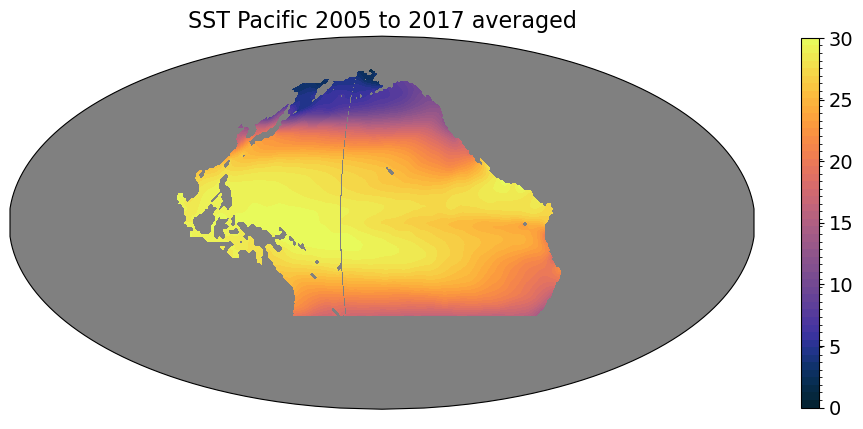

In [302]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific 2005 to 2017 averaged",fontsize=16)

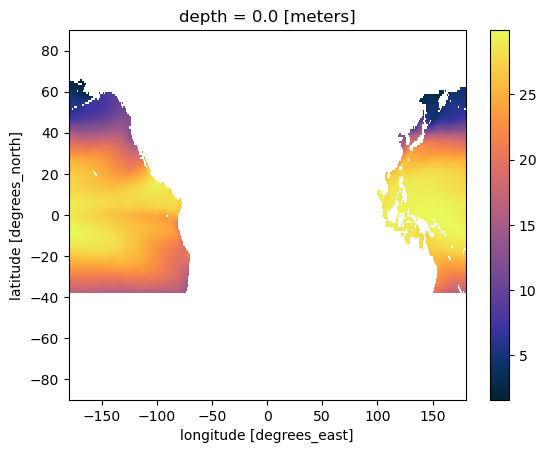

In [303]:
woa18_2005_17_pacific.isel(depth=0).plot(cmap=cmocean.cm.thermal)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1974')

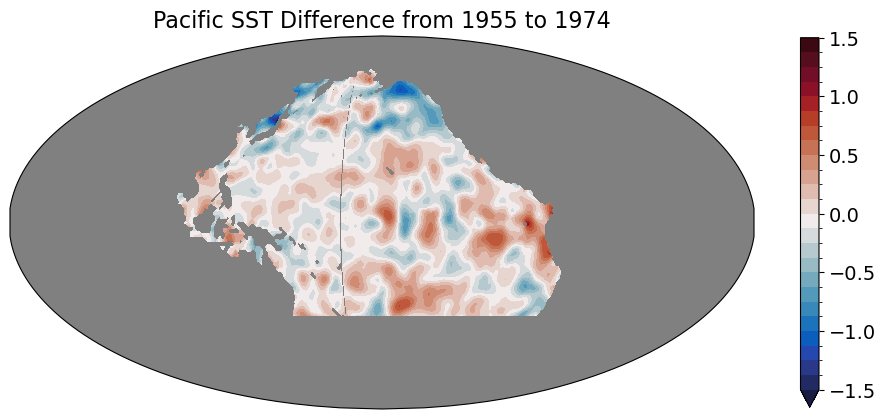

In [325]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_74.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1.5,vmax=1.5,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST Difference from 1955 to 1974",fontsize=16)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1974')

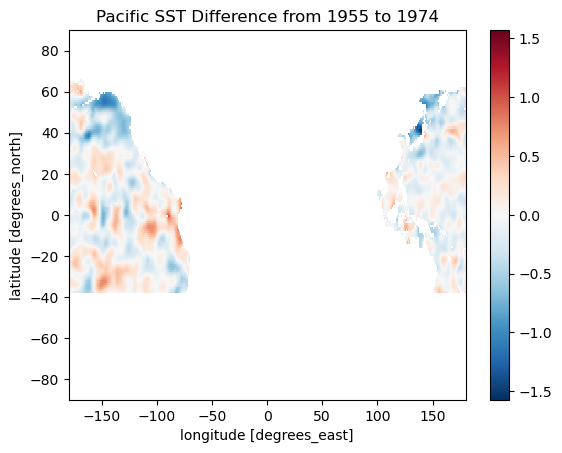

In [326]:
difference55_74.isel(depth=0).plot()
plt.title('Pacific SST Difference from 1955 to 1974')

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1984')

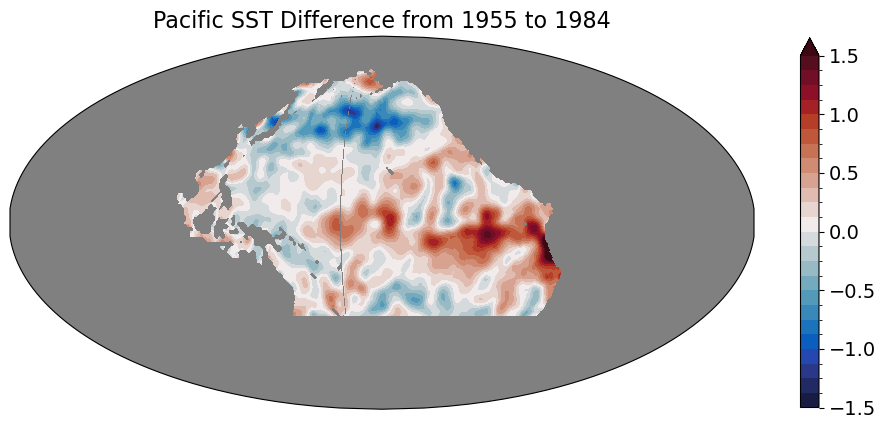

In [324]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_84.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1.5,vmax=1.5,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST Difference from 1955 to 1984",fontsize=16)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1984')

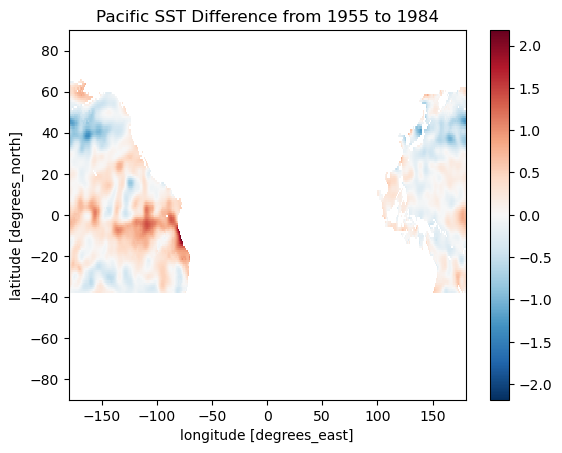

In [323]:
difference55_84.isel(depth=0).plot()
plt.title('Pacific SST Difference from 1955 to 1984')

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1994')

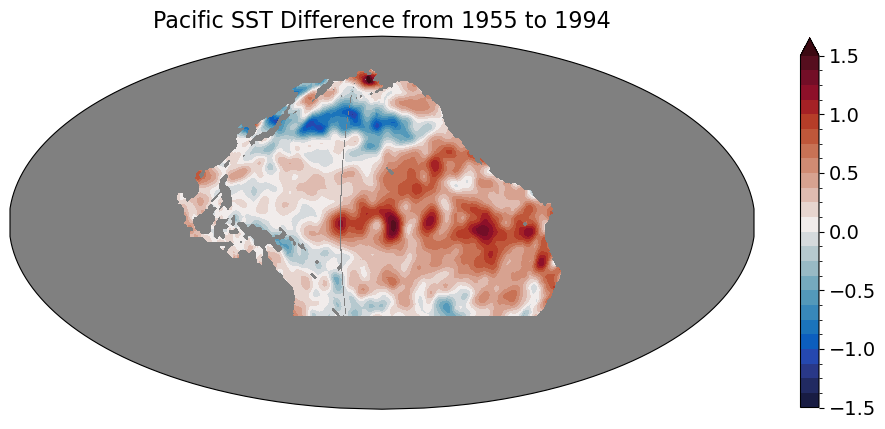

In [321]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_94.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1.5,vmax=1.5,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST Difference from 1955 to 1994",fontsize=16)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 1994')

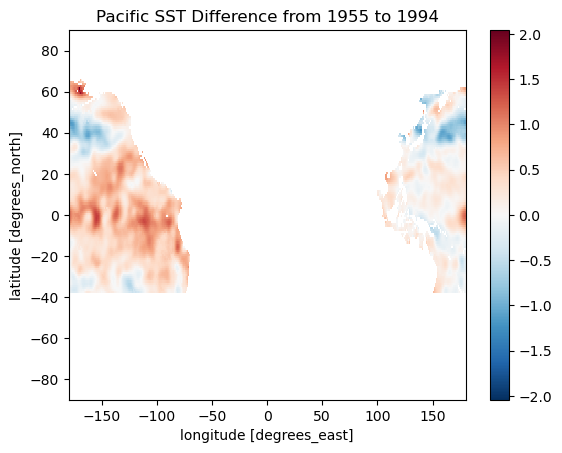

In [316]:
difference55_94.isel(depth=0).plot()
plt.title('Pacific SST Difference from 1955 to 1994')

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 2004')

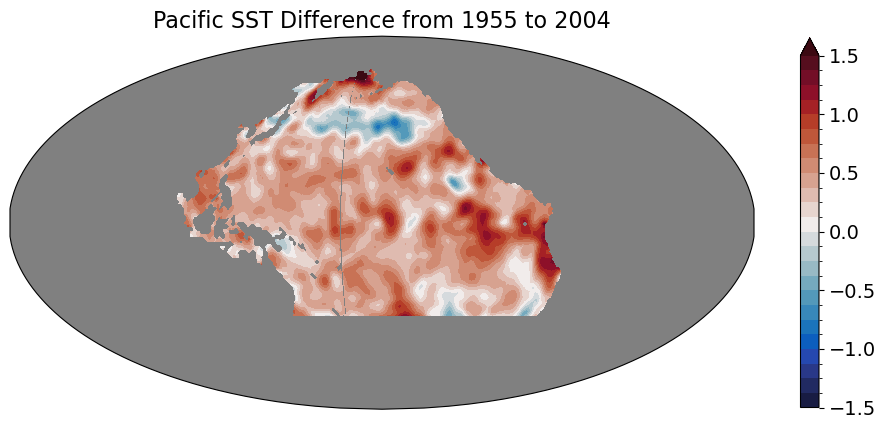

In [320]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_04.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1.5,vmax=1.5,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST Difference from 1955 to 2004",fontsize=16)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 2004')

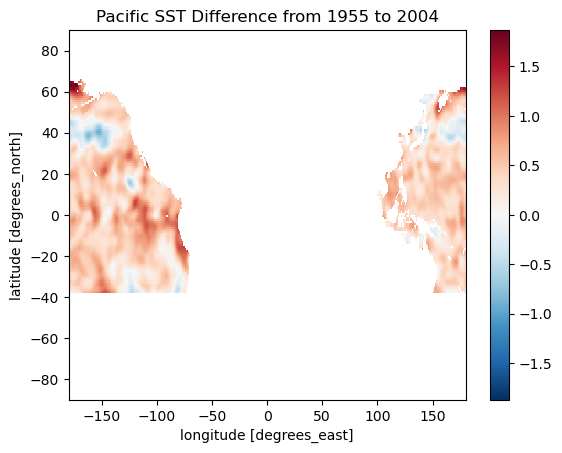

In [318]:
difference55_04.isel(depth=0).plot()
plt.title('Pacific SST Difference from 1955 to 2004')

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 2017')

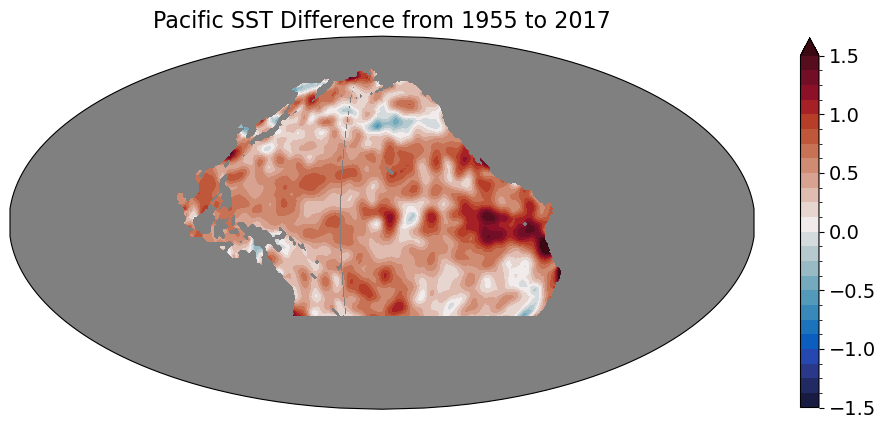

In [319]:
subplot_kws = dict(projection=ccrs.Mollweide(central_longitude=-160),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_17.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1.5,vmax=1.5,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST Difference from 1955 to 2017",fontsize=16)

Text(0.5, 1.0, 'Pacific SST Difference from 1955 to 2017')

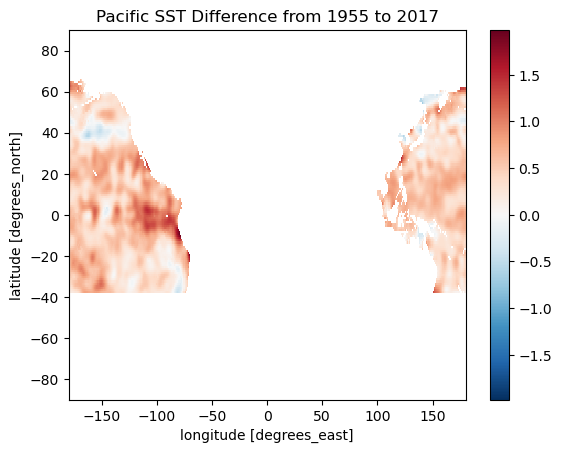

In [317]:
difference55_17.isel(depth=0).plot()
plt.title('Pacific SST Difference from 1955 to 2017')

In [ ]:
global_heat_content = ocean_heat_content_0_700.yearl_h22_WO

atlantic_heat_content = ocean_heat_content_0_700.yearl_h22_AO

indian_heat_content = ocean_heat_content_0_700.yearl_h22_IO

pacific_heat_content = ocean_heat_content_0_700.yearl_h22_PO

southern_heat_content = ocean_heat_content_0_700.yearl_h22_SH

northern_heat_content = ocean_heat_content_0_700.yearl_h22_NH

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
global_heat = global_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
atlantic_heat = atlantic_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
indian_heat = pacific_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
pacific_heat = southern_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
southern_heat = indian_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
northern_heat = northern_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(global_heat['time'],
       ocean_heat_content_0_700.yearl_h22_WO, color = 'k', label='Global')
ax.plot(atlantic_heat['time'],
    ocean_heat_content_0_700.yearl_h22_AO, color = 'b', label='Atlantic Ocean')
ax.plot(indian_heat['time'],
        ocean_heat_content_0_700.yearl_h22_IO, color = 'red', label='Indian Ocean')
ax.plot(pacific_heat['time'],
        ocean_heat_content_0_700.yearl_h22_PO, color = 'green', label='Pacific Ocean')
ax.plot(southern_heat['time'],
        ocean_heat_content_0_700.yearl_h22_SH, color = 'orange', label='Southern Hemisphere')
ax.plot(northern_heat['time'],
        ocean_heat_content_0_700.yearl_h22_NH, color = 'yellow', label='Northern Hemisphere')

plt.title('Ocean Heat Content 0-700 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
south_atlantic_heat_content = ocean_heat_content_0_700.yearl_h22_SA
south_pacific_heat_content = ocean_heat_content_0_700.yearl_h22_SP
south_indian_heat_content = ocean_heat_content_0_700.yearl_h22_SI

In [ ]:
time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
south_atlantic = south_atlantic_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
south_pacific = south_pacific_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
south_indian = south_indian_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(south_atlantic['time'],
       ocean_heat_content_0_700.yearl_h22_SA, color = 'k', label='Southern Atlantic Ocean')
ax.plot(south_pacific['time'],
    ocean_heat_content_0_700.yearl_h22_SP, color = 'b', label='Southern Pacific Ocean')
ax.plot(south_indian['time'],
        ocean_heat_content_0_700.yearl_h22_SI, color = 'red', label='Southern Indian Ocean')


plt.title('Southern Hemisphere Ocean Heat Content 0-700 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
north_atlantic_heat_content = ocean_heat_content_0_700.yearl_h22_NA
north_pacific_heat_content = ocean_heat_content_0_700.yearl_h22_NP
north_indian_heat_content = ocean_heat_content_0_700.yearl_h22_NI

In [ ]:
time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
north_atlantic = north_atlantic_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
north_pacific = north_pacific_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
north_indian = north_indian_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(north_atlantic['time'],
       ocean_heat_content_0_700.yearl_h22_NA, color = 'k', label='Northern Atlantic Ocean')
ax.plot(north_pacific['time'],
    ocean_heat_content_0_700.yearl_h22_NP, color = 'b', label='Northern Pacific Ocean')
ax.plot(north_indian['time'],
        ocean_heat_content_0_700.yearl_h22_NI, color = 'red', label='Northern Indian Ocean')


plt.title('Northern Hemisphere Ocean Heat Content 0-700 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
global_heat_content2 = ocean_heat_content_0_2000.yearl_h22_WO

atlantic_heat_content2 = ocean_heat_content_0_2000.yearl_h22_AO

indian_heat_content2 = ocean_heat_content_0_2000.yearl_h22_IO

pacific_heat_content2 = ocean_heat_content_0_2000.yearl_h22_PO

southern_heat_content2 = ocean_heat_content_0_2000.yearl_h22_SH

northern_heat_content2 = ocean_heat_content_0_2000.yearl_h22_NH

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
global_heat2 = global_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
atlantic_heat2 = atlantic_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
indian_heat2 = pacific_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
pacific_heat2 = southern_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
southern_heat2 = indian_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
northern_heat2 = northern_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(global_heat2['time'],
       ocean_heat_content_0_2000.yearl_h22_WO, color = 'k', label='Global')
ax.plot(atlantic_heat2['time'],
    ocean_heat_content_0_2000.yearl_h22_AO, color = 'b', label='Atlantic Ocean')
ax.plot(indian_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_IO, color = 'red', label='Indian Ocean')
ax.plot(pacific_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_PO, color = 'green', label='Pacific Ocean')
ax.plot(southern_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_SH, color = 'orange', label='Southern Hemisphere')
ax.plot(northern_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_NH, color = 'yellow', label='Northern Hemisphere')

plt.title('Ocean Heat Content 0-2000 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
south_atlantic_heat_content2 = ocean_heat_content_0_2000.yearl_h22_SA
south_pacific_heat_content2 = ocean_heat_content_0_2000.yearl_h22_SP
south_indian_heat_content2 = ocean_heat_content_0_2000.yearl_h22_SI

In [ ]:
time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
south_atlantic2 = south_atlantic_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_1955_2022 = pd.date_range("2005","2023", freq="Y")
south_pacific2 = south_pacific_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_1955_2022 = pd.date_range("2005","2023", freq="Y")
south_indian2 = south_indian_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(south_atlantic2['time'],
       ocean_heat_content_0_2000.yearl_h22_SA, color = 'k', label='Southern Atlantic Ocean')
ax.plot(south_pacific2['time'],
    ocean_heat_content_0_2000.yearl_h22_SP, color = 'b', label='Southern Pacific Ocean')
ax.plot(south_indian2['time'],
        ocean_heat_content_0_2000.yearl_h22_SI, color = 'red', label='Southern Indian Ocean')


plt.title('Southern Hemisphere Ocean Heat Content 0-2000 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(south_atlantic2['time'],
       ocean_heat_content_0_2000.yearl_h22_SA, color = 'k', label='Southern Atlantic Ocean')
ax.plot(south_pacific2['time'],
    ocean_heat_content_0_2000.yearl_h22_SP, color = 'b', label='Southern Pacific Ocean')
ax.plot(south_indian2['time'],
        ocean_heat_content_0_2000.yearl_h22_SI, color = 'red', label='Southern Indian Ocean')

std_SA = ocean_heat_content_0_2000.yearl_h22_SA.std()
std_SP = ocean_heat_content_0_2000.yearl_h22_SP.std()
std_SI = ocean_heat_content_0_2000.yearl_h22_SI.std()

ax.fill_between(south_atlantic2['time'], ocean_heat_content_0_2000.yearl_h22_NA - std_SA, ocean_heat_content_0_2000.yearl_h22_NA + std_SA, color='k', alpha=0.2)
ax.fill_between(south_pacific2['time'], ocean_heat_content_0_2000.yearl_h22_NP - std_SP, ocean_heat_content_0_2000.yearl_h22_NP + std_SP, color='b', alpha=0.2)
ax.fill_between(south_indian2['time'], ocean_heat_content_0_2000.yearl_h22_NI - std_SI, ocean_heat_content_0_2000.yearl_h22_NI + std_SI, color='red', alpha=0.2)

plt.title('Southern Hemisphere Ocean Heat Content 0-2000 Meters With Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
north_atlantic_heat_content2 = ocean_heat_content_0_2000.yearl_h22_NA
north_pacific_heat_content2 = ocean_heat_content_0_2000.yearl_h22_NP
north_indian_heat_content2 = ocean_heat_content_0_2000.yearl_h22_NI

In [ ]:
time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
north_atlantic2 = north_atlantic_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
north_pacific2 = north_pacific_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

time_axis_2005_2023 = pd.date_range("2005","2023", freq="Y")
north_indian2 = north_indian_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2023})

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(north_atlantic2['time'],
       ocean_heat_content_0_2000.yearl_h22_NA, color = 'k', label='Northern Atlantic Ocean')
ax.plot(north_pacific2['time'],
    ocean_heat_content_0_2000.yearl_h22_NP, color = 'b', label='Northern Pacific Ocean')
ax.plot(north_indian2['time'],
        ocean_heat_content_0_2000.yearl_h22_NI, color = 'red', label='Northern Indian Ocean')

plt.title('Northern Hemisphere Ocean Heat Content 0-700 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(north_atlantic2['time'],
       ocean_heat_content_0_2000.yearl_h22_NA, color = 'k', label='Northern Atlantic Ocean')
ax.plot(north_pacific2['time'],
    ocean_heat_content_0_2000.yearl_h22_NP, color = 'b', label='Northern Pacific Ocean')
ax.plot(north_indian2['time'],
        ocean_heat_content_0_2000.yearl_h22_NI, color = 'red', label='Northern Indian Ocean')

std_NA = ocean_heat_content_0_2000.yearl_h22_NA.std()
std_NP = ocean_heat_content_0_2000.yearl_h22_NP.std()
std_NI = ocean_heat_content_0_2000.yearl_h22_NI.std()

ax.fill_between(north_atlantic2['time'], ocean_heat_content_0_2000.yearl_h22_NA - std_NA, ocean_heat_content_0_2000.yearl_h22_NA + std_NA, color='k', alpha=0.2)
ax.fill_between(north_pacific2['time'], ocean_heat_content_0_2000.yearl_h22_NP - std_NP, ocean_heat_content_0_2000.yearl_h22_NP + std_NP, color='b', alpha=0.2)
ax.fill_between(north_indian2['time'], ocean_heat_content_0_2000.yearl_h22_NI - std_NI, ocean_heat_content_0_2000.yearl_h22_NI + std_NI, color='red', alpha=0.2)


plt.title('Northern Hemisphere Ocean Heat Content 0-700 Meters With Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()
plt.grid(which='major', axis='y', linewidth='1', color = 'grey')

In [ ]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
google_cloud_cmip6

In [ ]:
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'thetao' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [ ]:
gfdl_esm4_thetao_data

In [ ]:
zstore_esm4_thetao = gfdl_esm4_thetao_data.zstore.values[-1]
zstore_esm4_thetao

In [ ]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:

mapper_esm4_thetao = gcs.get_mapper(zstore_esm4_thetao)
gfdl_esm4_thetao = xr.open_zarr(mapper_esm4_thetao, 
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao

In [ ]:
thetao_pacific = gfdl_esm4_thetao.sel(latitude=slice(-60, 60), longitude=slice(100, 290))

In [ ]:
esm4_temp_05_17_pacific = thetao_pacific.sel(time=slice('2005-01-16', '2017-12-16')).mean(dim='time')
esm4_temp_50_14_pacific = thetao_pacific.sel(time=slice('1850-01-16', '2014-12-16')).mean(dim='time')
esm4_temp_55_64_pacific = thetao_pacific.sel(time=slice('1955-01-16', '1964-12-16')).mean(dim='time')

difference_esm4_pacific = esm4_temp_50_14_pacific - esm4_temp_55_64_pacific
difference_esm4_pacific2 = esm4_temp_05_17_pacific - esm4_temp_55_64_pacific

In [ ]:
difference_esm4_pacific 

Text(0.5, 1.0, 'Pacific Potential Temperature Observation')

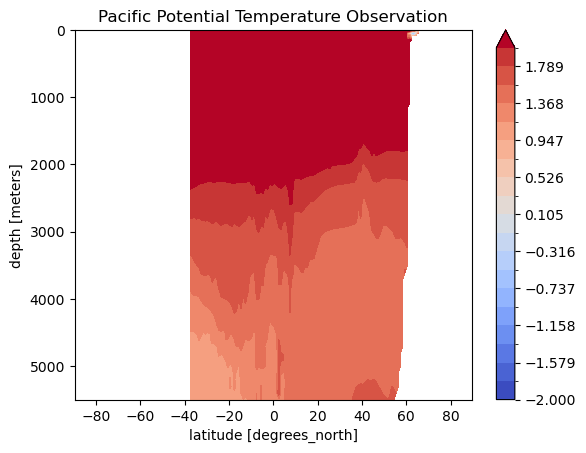

In [282]:
woa18_1955_64_pacific.mean(dim='lon').plot.contourf(yincrease=False,
                                                                vmin=-2, vmax=2,
                                                                cmap= 'coolwarm', levels=20)
plt.title('Pacific Potential Temperature Observation')

Text(0.5, 1.0, 'Pacific Potential Temperature Observation')

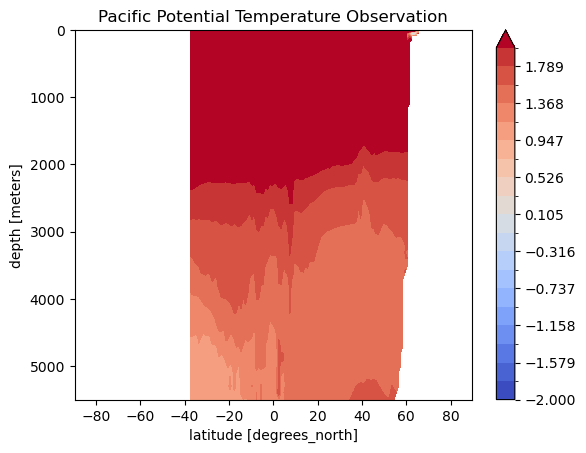

In [283]:
woa18_2005_17_pacific.mean(dim='lon').plot.contourf(yincrease=False,
                                                                vmin=-2, vmax=2,
                                                                cmap= 'coolwarm', levels=20)
plt.title('Pacific Potential Temperature Observation')

Text(0.5, 1.0, 'Pacific Potential Temperature Models')

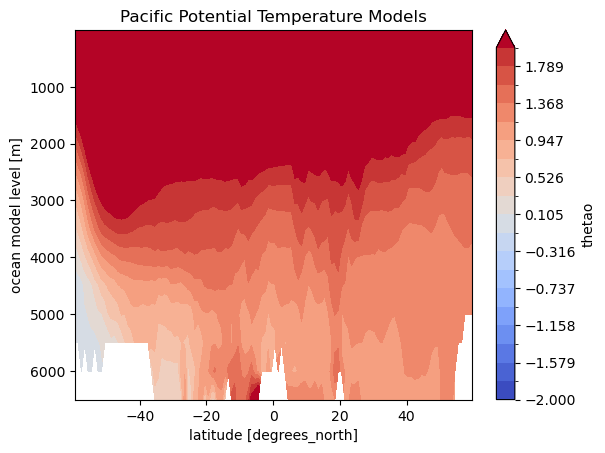

In [287]:
esm4_temp_05_17_pacific.mean(dim='longitude').plot.contourf(yincrease=False,
    vmin = -2, vmax= 2, cmap = 'coolwarm', levels = 20
                                            )
plt.title('Pacific Potential Temperature Models')

Text(0.5, 1.0, 'Pacific Potential Temperature Models')

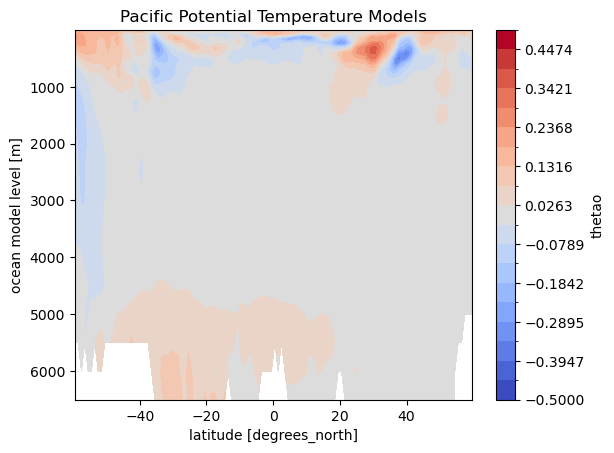

In [288]:
difference_esm4_pacific.mean(dim='longitude').plot.contourf(yincrease=False,
    vmin = -0.5, vmax= 0.5, cmap = 'coolwarm', levels = 20
                                            )
plt.title('Pacific Potential Temperature Models')

Text(0.5, 1.0, 'Pacific Potential Temperature Models')

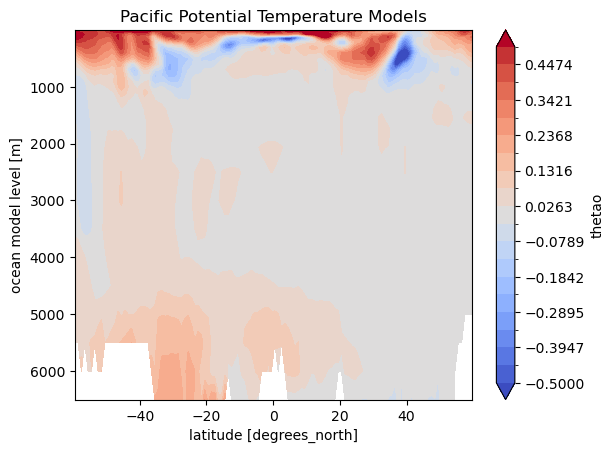

In [289]:
difference_esm4_pacific2.mean(dim='longitude').plot.contourf(yincrease=False,
    vmin = -0.5, vmax= 0.5, cmap = 'coolwarm', levels = 20
                                            )
plt.title('Pacific Potential Temperature Models')